<a href="https://colab.research.google.com/github/leadeeerq/data-science/blob/main/230303_BabyNamesDataAnalysisAndVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

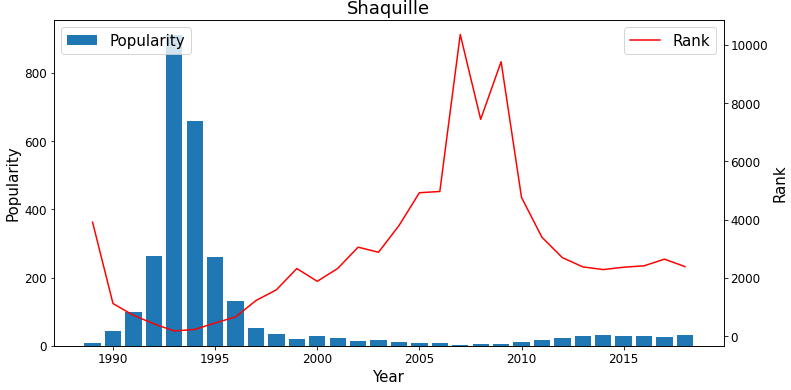

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

##Data import

In [2]:
df = pd.read_csv('/content/drive/MyDrive/230222_Master 12 Advanced Projects/us_baby_names.csv')

In [3]:
df.head()

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


###Changing the type of the data: string -> category

In [5]:
df.Gender = df.Gender.astype('category')

##Most frequent names in 2018

In [6]:
names_2018 = df[df.Year == 2018].copy()

In [7]:
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [8]:
names_2018[names_2018.Gender == 'F'].nlargest(5, 'Count')

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928


In [9]:
names_2018[names_2018.Gender == 'M'].nlargest(5, 'Count')

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389


###Function returning most popular names

In [10]:
def most_pop(year, gender, n = 5):
  return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, 'Count')

In [11]:
most_pop(1900, 'M')

,Year,Name,Gender,Count
54489,1900,John,M,9829
54490,1900,William,M,8579
54491,1900,James,M,7245
54492,1900,George,M,5403
54493,1900,Charles,M,4098


In [12]:
most_pop(1950, 'M')

,Year,Name,Gender,Count
468058,1950,James,M,86224
468059,1950,Robert,M,83559
468060,1950,John,M,79424
468061,1950,Michael,M,65144
468062,1950,David,M,60727


In [13]:
most_pop(1975, 'M')

,Year,Name,Gender,Count
784673,1975,Michael,M,68454
784674,1975,Jason,M,52186
784675,1975,Christopher,M,46592
784676,1975,James,M,39591
784677,1975,David,M,39177


##Are there names that were popular in 1880 and now?

In [14]:
M_1880 = most_pop(1880, 'M', 20)
M_2018 = most_pop(2018, 'M', 20)

In [15]:
pop_male = M_1880[['Name', 'Count']].merge(M_2018[['Name', 'Count']], how = 'inner', on = 'Name', suffixes = ('_1880', '_2018'))

In [16]:
F_1880 = most_pop(1880, 'F', 20)
F_2018 = most_pop(2018, 'F', 20)
pop_female = F_1880[['Name', 'Count']].merge(F_2018[['Name', 'Count']], how = 'inner', on = 'Name', suffixes = ('_1880', '_2018'))

##Are there the same names popular for men and women?

In [17]:
df.groupby(['Name', 'Gender'])['Count'].sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,F,0
Aaban,M,114
Aabha,F,35
Aabha,M,0
Aabid,F,0
...,...,...
Zyyanna,M,0
Zyyon,F,0
Zyyon,M,6


##Data aggregation

In [18]:
agg = df.groupby(['Name', 'Gender']).agg(Total = ('Count', 'sum'),
                                         Num_of_year = ('Count', 'count'),
                                         First_year = ('Year', 'min'),
                                         Last_year = ('Year', 'max'),
                                         Max_count = ('Count', 'max'))

In [19]:
agg

Total  Num_of_year  First_year  Last_year  Max_count
Name    Gender                                                      
Aaban   F           0            0         NaN        NaN        NaN
        M         114           11     2007.00    2018.00      16.00
Aabha   F          35            5     2011.00    2016.00       9.00
        M           0            0         NaN        NaN        NaN
Aabid   F           0            0         NaN        NaN        NaN
...               ...          ...         ...        ...        ...
Zyyanna M           0            0         NaN        NaN        NaN
Zyyon   F           0            0         NaN        NaN        NaN
        M           6            1     2014.00    2014.00       6.00
Zzyzx   F           0            0         NaN        NaN        NaN
        M          10            2     2010.00    2018.00       5.00

[196800 rows x 5 columns]

###Finding the year in which the name was the most popular

In [20]:
def most_pop_in_year(group):
  return group.nlargest(1, 'Count').Year

In [21]:
# most_pop = df.groupby(['Name', 'Gender']).apply(most_pop_in_year)

In [22]:
# most_pop

In [23]:
# most_pop.droplevel(-1)

In [24]:
# agg['Most_pop'] = most_pop.droplevel(-1)

In [25]:
agg.droplevel(-1)

,Total,Num_of_year,First_year,Last_year,Max_count
Name,,,,,
Aaban,0,0,NaN,NaN,NaN
Aaban,114,11,2007.00,2018.00,16.00
Aabha,35,5,2011.00,2016.00,9.00
Aabha,0,0,NaN,NaN,NaN
Aabid,0,0,NaN,NaN,NaN
...,...,...,...,...,...
Zyyanna,0,0,NaN,NaN,NaN
Zyyon,0,0,NaN,NaN,NaN
Zyyon,6,1,2014.00,2014.00,6.00


In [26]:
agg.reset_index(inplace = True)

##Most popular names of all times

In [27]:
agg.groupby('Gender').apply(lambda x: x.nlargest(10, 'Total'))

Name Gender    Total  Num_of_year  First_year  Last_year  \
Gender                                                                         
F      123434       Mary      F  4125675          139     1880.00    2018.00   
       55100   Elizabeth      F  1638349          139     1880.00    2018.00   
       142434   Patricia      F  1572016          135     1884.00    2018.00   
       83680    Jennifer      F  1467207          101     1916.00    2018.00   
       113152      Linda      F  1452668          139     1880.00    2018.00   
       21348     Barbara      F  1434397          139     1880.00    2018.00   
       121050   Margaret      F  1248985          139     1880.00    2018.00   
       170120      Susan      F  1121703          139     1880.00    2018.00   
       51256     Dorothy      F  1107635          139     1880.00    2018.00   
       157344      Sarah      F  1077746          139     1880.00    2018.00   
M      78267       James      M  5164280          139     1880.00    2018.00   
       86969        John      M  5124817          139     1880.00    2018.00   
       151747     Robert      M  4820129          139     1880.00    2018.00   
       127667    Michael      M  4362731          139     1880.00    2018.00   
       188363    William      M  4117369          139     1880.00    2018.00   
       43431       David      M  3621322          139     1880.00    2018.00   
       88407      Joseph      M  2613304          139     1880.00    2018.00   
       150755    Richard      M  2565301          139     1880.00    2018.00   
       32931     Charles      M  2392779          139     1880.00    2018.00   
       177369     Thomas      M  2311849          139     1880.00    2018.00   

               Max_count  
Gender                    
F      123434   73985.00  
       55100    20744.00  
       142434   56442.00  
       83680    63603.00  
       113152   99689.00  
       21348    48792.00  
       121050   28467.00  
       170120   47402.00  
       51256    39999.00  
       157344   28484.00  
M      78267    94757.00  
       86969    88319.00  
       151747   91640.00  
       127667   92704.00  
       188363   66989.00  
       43431    86253.00  
       88407    32732.00  
       150755   58868.00  
       32931    40770.00  
       177369   48652.00

In [28]:
all_times = agg.groupby('Gender').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop = True)

In [29]:
all_times

,Name,Gender,Total,Num_of_year,First_year,Last_year,Max_count
0,Mary,F,4125675,139,1880.00,2018.00,73985.00
1,Elizabeth,F,1638349,139,1880.00,2018.00,20744.00
2,Patricia,F,1572016,135,1884.00,2018.00,56442.00
3,Jennifer,F,1467207,101,1916.00,2018.00,63603.00
4,Linda,F,1452668,139,1880.00,2018.00,99689.00
5,Barbara,F,1434397,139,1880.00,2018.00,48792.00
6,Margaret,F,1248985,139,1880.00,2018.00,28467.00
7,Susan,F,1121703,139,1880.00,2018.00,47402.00
8,Dorothy,F,1107635,139,1880.00,2018.00,39999.00
9,Sarah,F,1077746,139,1880.00,2018.00,28484.00


In [30]:
import seaborn as sns

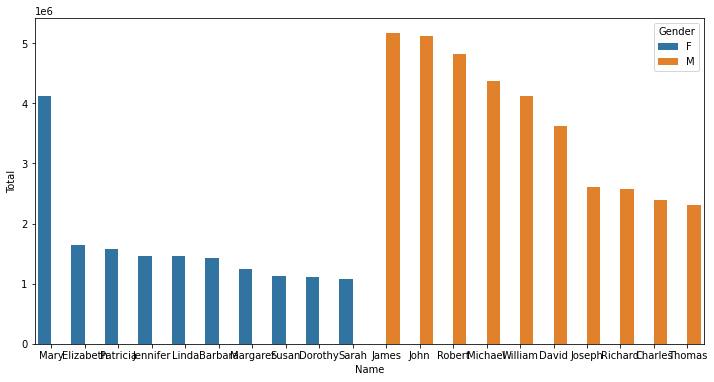

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Name', y = 'Total', data = all_times, hue = 'Gender')
plt.show()

##General trends over years

###Number of registered babies

In [32]:
pd.options.display.float_format = '{:.0f}'.format

In [33]:
babies_per_year = df.groupby('Year').Count.sum()

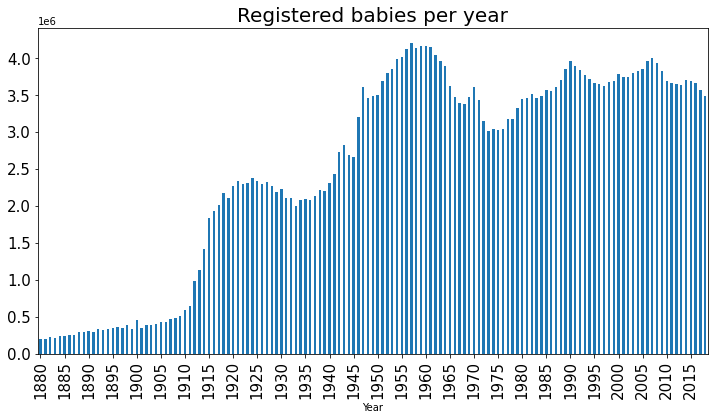

In [34]:
babies_per_year.plot(kind = 'bar', y = 'Count', figsize = (12, 6), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels = range(1880, 2019, 5))
plt.title('Registered babies per year', fontsize = 20)
plt.show()

###Diversity of names

In [35]:
unique_names = df.groupby('Year').Name.count()
unique_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

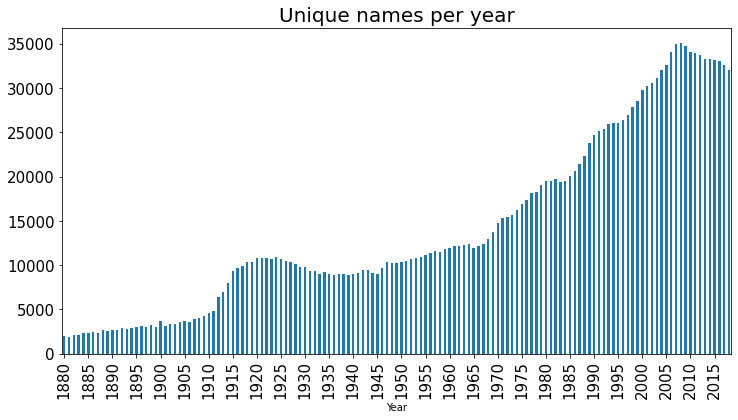

In [36]:
unique_names.plot(kind = 'bar', figsize = (12, 6), fontsize = 15)
plt.xticks(ticks = (range(0, len(unique_names), 5)), labels = range(1880, 2019, 5))
plt.title('Unique names per year', fontsize = 20)
plt.show()

##Additional features - popularity and rank

###Popularity - occurances per million

In [37]:
df.groupby(['Year', 'Gender']).Count.sum()

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [38]:
df.groupby(['Year', 'Gender']).Count.transform('sum')

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [39]:
df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1e6

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [40]:
df['Popularity'] = df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1e6

In [41]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


###Rank

In [42]:
df.groupby(['Year', 'Gender']).Count.apply(lambda x: x.rank(ascending = False))

0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [43]:
df['Rank'] = df.groupby(['Year', 'Gender']).Count.apply(lambda x: x.rank(ascending = False))

In [44]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


##Visualizing name trends over time

In [45]:
mary = df[(df.Name == 'Mary') & (df.Gender == 'F')]

In [46]:
mary.head(10)

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
2000,1881,Mary,F,6919,75245,1
3935,1882,Mary,F,8148,75551,1
6062,1883,Mary,F,8012,71333,1
8146,1884,Mary,F,9217,71439,1
10443,1885,Mary,F,9128,68603,1
12737,1886,Mary,F,9889,68420,1
15129,1887,Mary,F,9888,67735,1
17502,1888,Mary,F,11754,65804,1
20153,1889,Mary,F,11648,65304,1


In [47]:
mary.tail(10)

,Year,Name,Gender,Count,Popularity,Rank
1623431,2009,Mary,F,3163,1724,102
1658147,2010,Mary,F,2871,1617,108
1692223,2011,Mary,F,2706,1540,112
1726140,2012,Mary,F,2576,1465,121
1759884,2013,Mary,F,2651,1514,118
1793168,2014,Mary,F,2632,1477,120
1826414,2015,Mary,F,2631,1478,123
1859539,2016,Mary,F,2508,1420,127
1892548,2017,Mary,F,2402,1397,126
1925138,2018,Mary,F,2327,1379,126


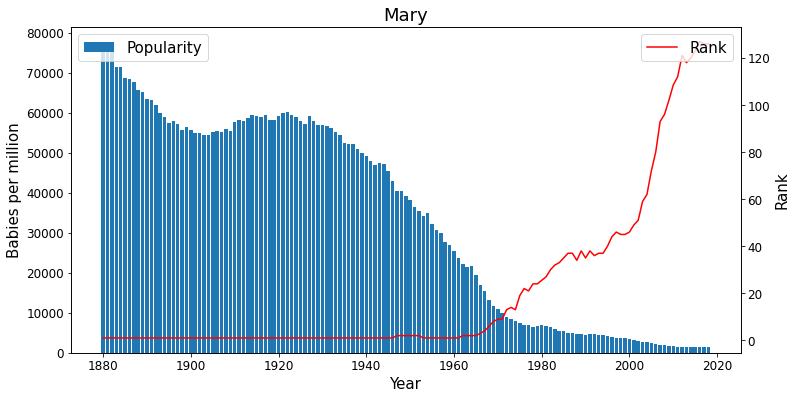

In [48]:
fig, ax1 = plt.subplots(figsize = (12, 6))
ax1.bar(x = mary.Year, height = mary.Popularity, label = 'Popularity')
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = 'red', label = 'Rank')
ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('Babies per million', fontsize = 15)
ax2.set_ylabel('Rank', fontsize = 15)
ax1.set_title('Mary', fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [49]:
def plot_name(name, gender, crit = 'Popularity'):
  data = df.loc[(df.Name == name) & (df.Gender == gender), ['Name', 'Gender', 'Year', 'Rank', crit]]
  data = data.set_index('Year')
  fig, ax1 = plt.subplots(figsize = (12, 6))
  ax1.bar(x = data.index, height = data[crit], label = crit)
  ax2 = ax1.twinx()
  ax2.plot(data.index, data.Rank, color = 'red', label = 'Rank')
  ax1.set_xlabel('Year', fontsize = 15)
  ax1.set_ylabel(crit, fontsize = 15)
  ax2.set_ylabel('Rank', fontsize = 15)
  ax1.set_title(name, fontsize = 18)
  ax1.tick_params(labelsize = 12)
  ax2.tick_params(labelsize = 12)
  ax1.legend(loc = 2, fontsize = 15)
  ax2.legend(loc = 1, fontsize = 15)
  plt.show()

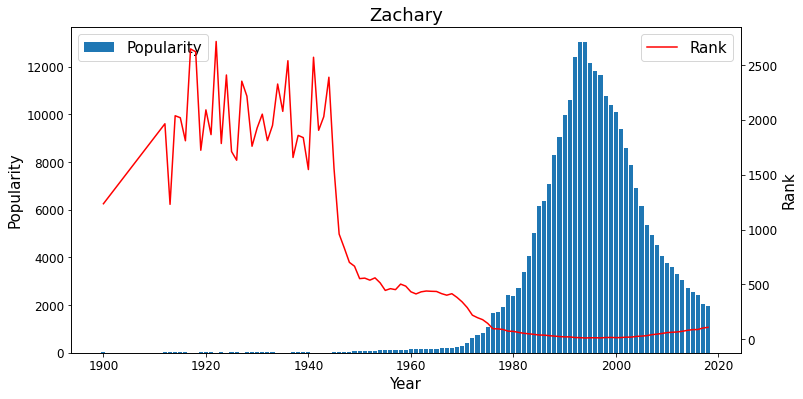

In [50]:
plot_name('Zachary', 'M')

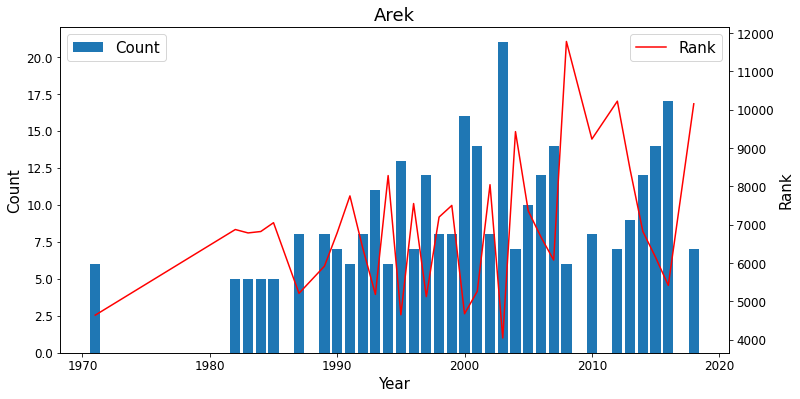

In [51]:
plot_name('Arek', 'M', crit = 'Count')

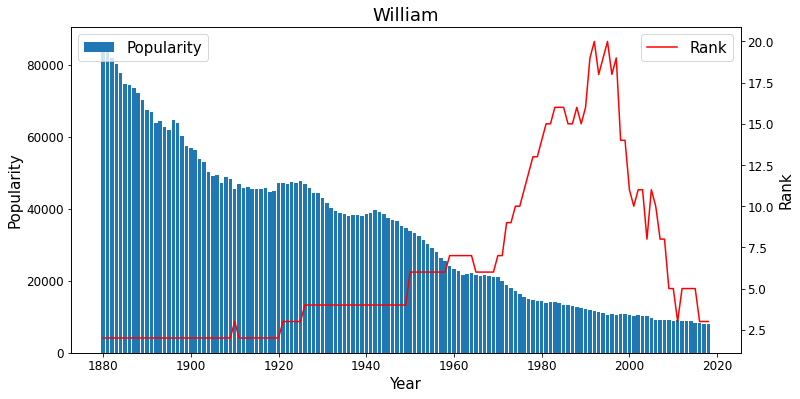

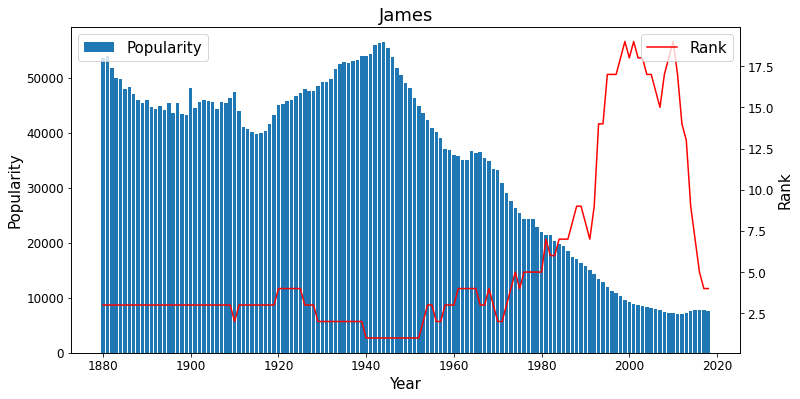

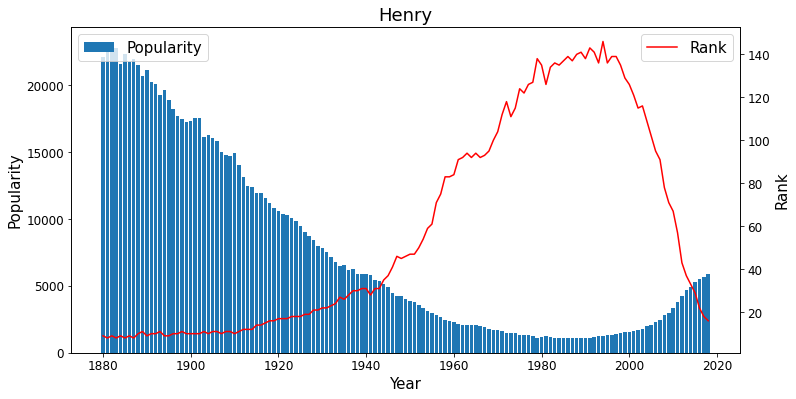

In [52]:
for name in pop_male.Name:
  plot_name(name, 'M')

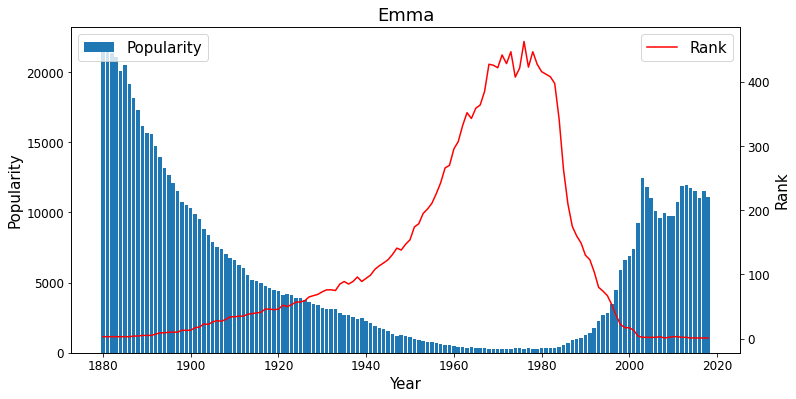

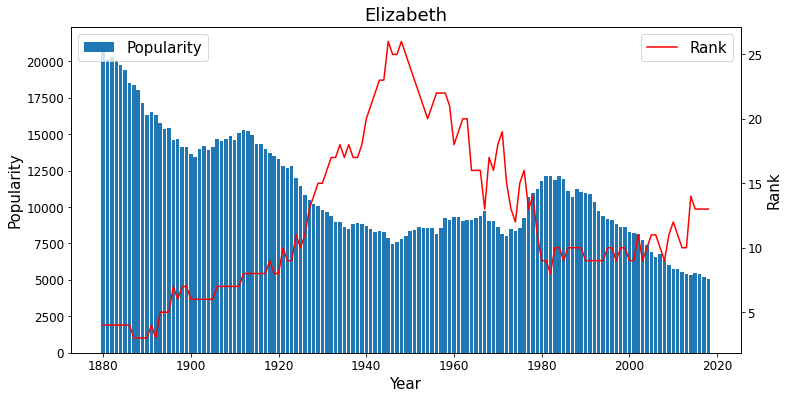

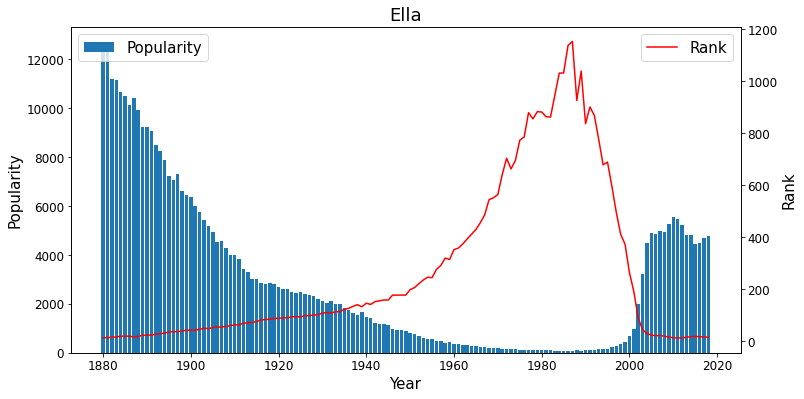

In [53]:
for name in pop_female.Name:
  plot_name(name, 'F')

##How does a name's popularity change?

In [54]:
df.loc[(df.Name == 'Mary') & (df.Gender == 'F'), 'Popularity']

0         77642
2000      75245
3935      75551
6062      71333
8146      71439
           ... 
1793168    1477
1826414    1478
1859539    1420
1892548    1397
1925138    1379
Name: Popularity, Length: 139, dtype: float64

In [55]:
df['Pop_lag'] = df.groupby(['Name', 'Gender']).Popularity.shift()

In [56]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag
0,1880,Mary,F,7065,77642,1,NaN
1,1880,Anna,F,2604,28617,2,NaN
2,1880,Emma,F,2003,22012,3,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN
4,1880,Minnie,F,1746,19188,5,NaN
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4
1957042,2018,Zyran,M,5,3,13042,3
1957043,2018,Zyrie,M,5,3,13042,3
1957044,2018,Zyron,M,5,3,13042,8


In [57]:
df.loc[(df.Year > 1880) & (df.Pop_lag.isna()), 'Pop_lag'] = 0

In [58]:
df[df.Name == 'Ashanti']

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag
700697,1970,Ashanti,F,14,8,4142,0
708512,1970,Ashanti,M,14,8,2565,0
714597,1971,Ashanti,F,21,13,3216,8
724746,1971,Ashanti,M,8,5,3809,8
729787,1972,Ashanti,F,21,14,3117,13
...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103
1857597,2015,Ashanti,M,5,3,13046,3
1860841,2016,Ashanti,F,161,91,1432,88
1893982,2017,Ashanti,F,140,81,1562,91


In [59]:
df['Pop_diff'] = df.Popularity - df.Pop_lag
df['Pop_diff_abs'] = abs(df.Popularity - df.Pop_lag)

In [60]:
df[(df.Name == 'Mary') & (df.Gender == 'F')]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag,Pop_diff,Pop_diff_abs
0,1880,Mary,F,7065,77642,1,NaN,NaN,NaN
2000,1881,Mary,F,6919,75245,1,77642,-2398,2398
3935,1882,Mary,F,8148,75551,1,75245,307,307
6062,1883,Mary,F,8012,71333,1,75551,-4219,4219
8146,1884,Mary,F,9217,71439,1,71333,107,107
...,...,...,...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1477,120,1514,-37,37
1826414,2015,Mary,F,2631,1478,123,1477,1,1
1859539,2016,Mary,F,2508,1420,127,1478,-58,58
1892548,2017,Mary,F,2402,1397,126,1420,-23,23


###The highest changes

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 9 columns):
 #   Column        Dtype   
---  ------        -----   
 0   Year          int64   
 1   Name          object  
 2   Gender        category
 3   Count         int64   
 4   Popularity    float64 
 5   Rank          float64 
 6   Pop_lag       float64 
 7   Pop_diff      float64 
 8   Pop_diff_abs  float64 
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 121.3+ MB


In [62]:
df.nlargest(20,'Pop_diff_abs')

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag,Pop_diff,Pop_diff_abs
431066,1947,Linda,F,99689,56236,1,33547,22689,22689
321479,1935,Shirley,F,42358,40398,2,21874,18524,18524
922468,1983,Ashley,F,33293,19930,4,8775,11156,11156
339412,1937,Shirley,F,26816,25204,4,33798,-8593,8593
711426,1971,Jennifer,F,56783,34134,1,26403,7730,7730
47952,1898,Dewey,M,1115,9088,19,1401,7687,7687
726721,1972,Jennifer,F,63603,41813,1,34134,7680,7680
312301,1934,Shirley,F,22840,21874,4,14203,7671,7671
645417,1966,Michelle,F,27151,16047,4,9186,6861,6861
751941,1973,Jason,M,46683,29940,3,23081,6859,6859


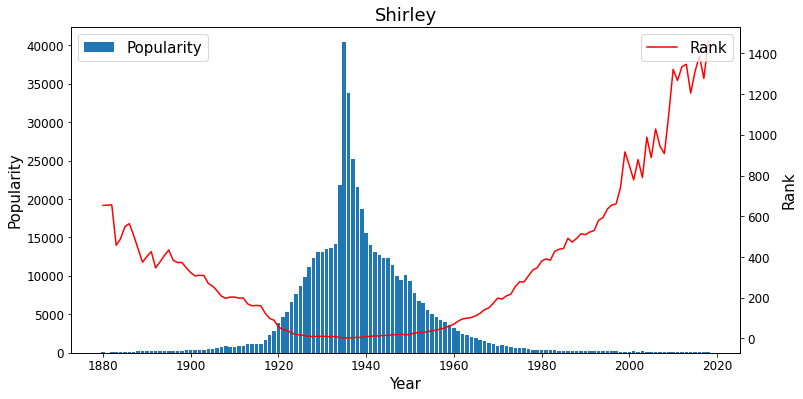

In [63]:
plot_name('Shirley', 'F')

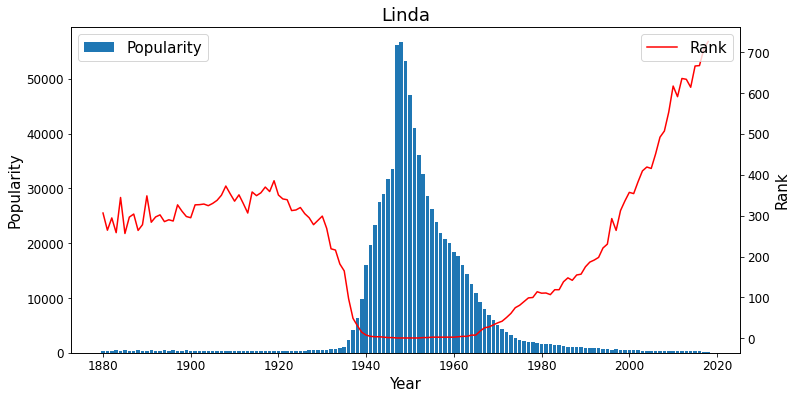

In [64]:
plot_name('Linda', 'F')

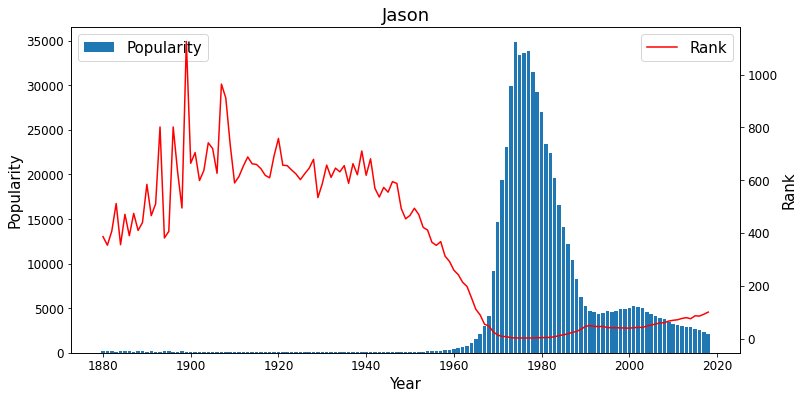

In [65]:
plot_name('Jason', 'M')

In [66]:
df.nsmallest(20, 'Pop_diff')

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag,Pop_diff,Pop_diff_abs
339412,1937,Shirley,F,26816,25204,4,33798,-8593,8593
330516,1936,Shirley,F,35161,33798,2,40398,-6601,6601
461947,1950,Linda,F,80431,46952,1,53199,-6248,6248
472250,1951,Linda,F,73978,41079,1,46952,-5872,5872
961380,1985,Jennifer,F,42651,24789,3,30032,-5243,5243
482712,1952,Linda,F,67082,36174,1,41079,-4905,4905
696648,1970,Lisa,F,38963,22288,2,26692,-4404,4404
51103,1899,Dewey,M,499,4698,39,9088,-4390,4390
437173,1947,Richard,M,58521,31990,5,36252,-4263,4263
537623,1957,Deborah,F,40071,19601,6,23827,-4226,4226


###Names out of nowhere

In [67]:
df[(df.Pop_lag < 5)].nlargest(20, 'Pop_diff')

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag,Pop_diff,Pop_diff_abs
758040,1974,Nakia,F,1134,773,226,5,768,768
808621,1977,Kizzy,F,1116,728,223,0,728,728
1060680,1989,Christop,M,1082,541,242,0,541,541
768358,1974,Nakia,M,612,389,302,0,389,389
820064,1977,Levar,M,523,318,342,0,318,318
48244,1898,Hobson,M,38,310,311,0,310,310
645832,1966,Tabatha,F,500,296,419,3,293,293
1553888,2007,Jaslene,F,501,261,600,3,258,258
1223510,1996,Moesha,F,426,243,548,0,243,243
1070200,1990,Isamar,F,446,235,534,0,235,235


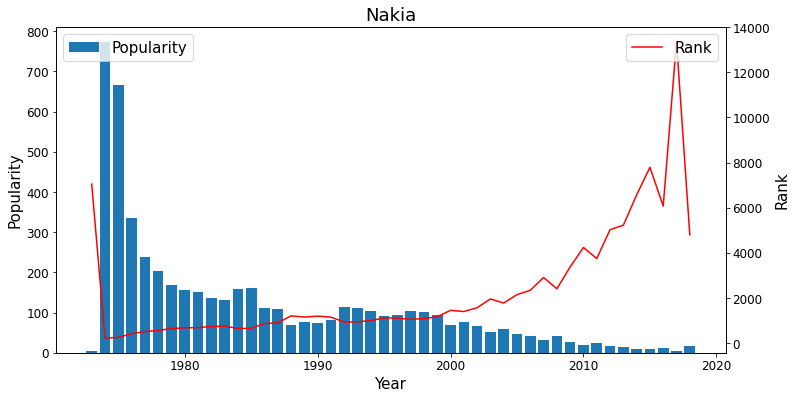

In [68]:
plot_name('Nakia', 'F')

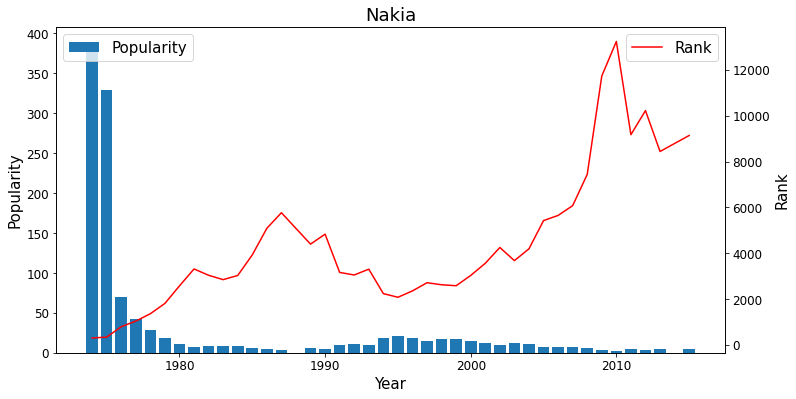

In [69]:
plot_name('Nakia', 'M')

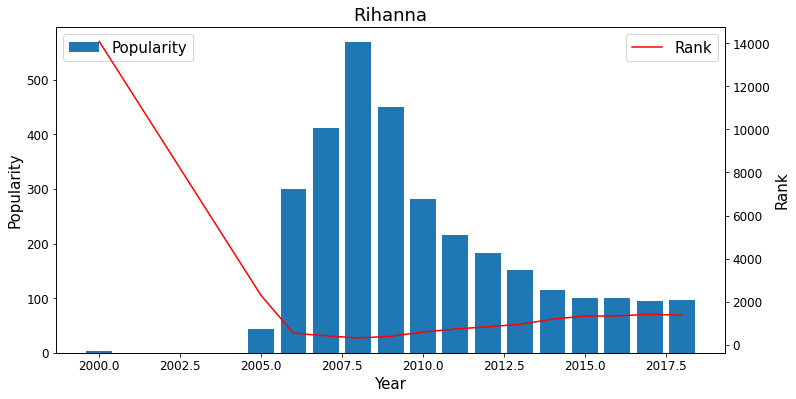

In [70]:
plot_name('Rihanna', 'F')

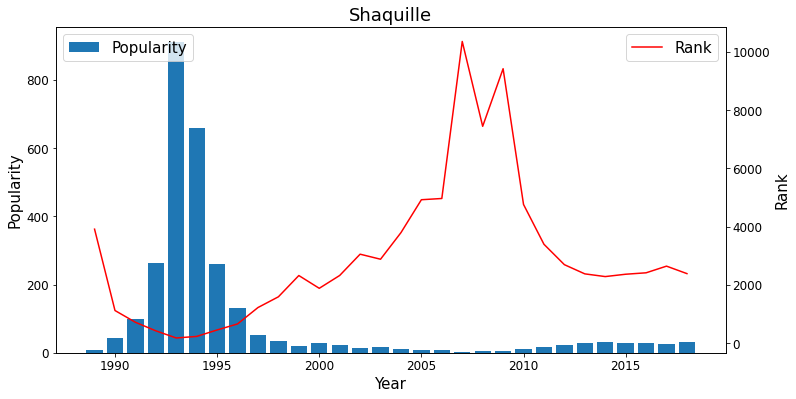

In [71]:
plot_name('Shaquille', 'M')

##Highest percentage change

In [72]:
df['Pct_change'] = df.Popularity.div(df.Pop_lag).sub(1).mul(100)

In [73]:
df[2000:]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag,Pop_diff,Pop_diff_abs,Pct_change
2000,1881,Mary,F,6919,75245,1,77642,-2398,2398,-3
2001,1881,Anna,F,2698,29341,2,28617,724,724,3
2002,1881,Emma,F,2034,22120,3,22012,108,108,0
2003,1881,Elizabeth,F,1852,20141,4,21309,-1168,1168,-5
2004,1881,Margaret,F,1658,18031,5,17342,689,689,4
...,...,...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1,1,-27
1957042,2018,Zyran,M,5,3,13042,3,-0,0,-12
1957043,2018,Zyrie,M,5,3,13042,3,0,0,2
1957044,2018,Zyron,M,5,3,13042,8,-5,5,-66


In [74]:
df[df.Pop_lag > 1000].nsmallest(20, 'Pct_change')

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag,Pop_diff,Pop_diff_abs,Pct_change
758121,1974,Katina,F,765,521,307,1697,-1175,1175,-69
1119924,1992,Iesha,F,581,315,432,1011,-696,696,-69
1423744,2003,Ashanti,F,962,527,325,1640,-1113,1113,-68
515370,1955,Marian,F,1499,767,208,2067,-1300,1300,-63
175401,1920,Woodrow,M,774,727,182,1845,-1117,1117,-61
35688,1894,Grover,M,118,1019,137,2573,-1554,1554,-60
5152,1882,Garfield,M,69,607,190,1459,-852,852,-58
1145180,1993,Hillary,F,1064,588,261,1367,-779,779,-57
1249716,1997,Shania,F,861,495,330,1047,-552,552,-53
21714,1889,Grover,M,210,1899,84,3922,-2023,2023,-52


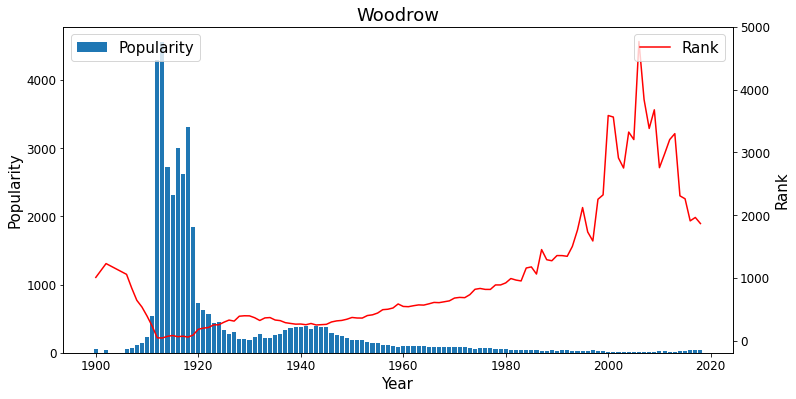

In [75]:
plot_name('Woodrow', 'M')

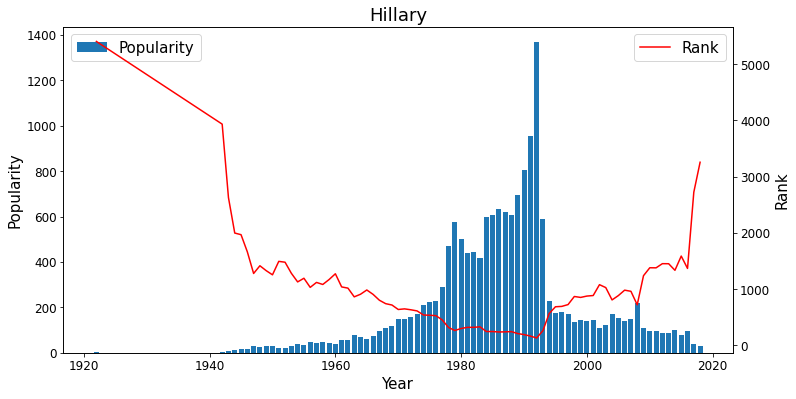

In [76]:
plot_name('Hillary', 'F' )

##Persistant vs. spike-fade names

In [77]:
agg

,Name,Gender,Total,Num_of_year,First_year,Last_year,Max_count
0,Aaban,F,0,0,NaN,NaN,NaN
1,Aaban,M,114,11,2007,2018,16
2,Aabha,F,35,5,2011,2016,9
3,Aabha,M,0,0,NaN,NaN,NaN
4,Aabid,F,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
196795,Zyyanna,M,0,0,NaN,NaN,NaN
196796,Zyyon,F,0,0,NaN,NaN,NaN
196797,Zyyon,M,6,1,2014,2014,6
196798,Zzyzx,F,0,0,NaN,NaN,NaN


In [78]:
agg['Spike_score'] = agg.Max_count.div(agg.Total).mul(100)

In [79]:
agg.sort_values(by = 'Spike_score', ascending = True).head(20)

,Name,Gender,Total,Num_of_year,First_year,Last_year,Max_count,Spike_score
88407,Joseph,M,2613304,139,1880,2018,32732,1
55100,Elizabeth,F,1638349,139,1880,2018,20744,1
152976,Rosa,F,174125,139,1880,2018,2230,1
124465,Maurice,M,134504,139,1880,2018,1743,1
45648,Delia,F,36276,139,1880,2018,491,1
38023,Cornelius,M,35764,139,1880,2018,485,1
50293,Domingo,M,13797,121,1882,2018,190,1
123019,Marshall,M,91352,139,1880,2018,1270,1
175971,Teodoro,M,3079,111,1884,2018,43,1
186037,Victor,M,317673,139,1880,2018,4444,1


In [80]:
pers = agg.sort_values(by = 'Spike_score', ascending = True).head(20)

In [81]:
l = list(zip(pers.Name, pers.Gender))

In [82]:
l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F'),
 ('Cornelius', 'M'),
 ('Domingo', 'M'),
 ('Marshall', 'M'),
 ('Teodoro', 'M'),
 ('Victor', 'M'),
 ('Nelson', 'M'),
 ('Sina', 'F'),
 ('Lovell', 'M'),
 ('Katheryn', 'F'),
 ('Zenobia', 'F'),
 ('Theron', 'M'),
 ('Alida', 'F'),
 ('Alfonso', 'M'),
 ('Manuel', 'M'),
 ('Jessie', 'M')]

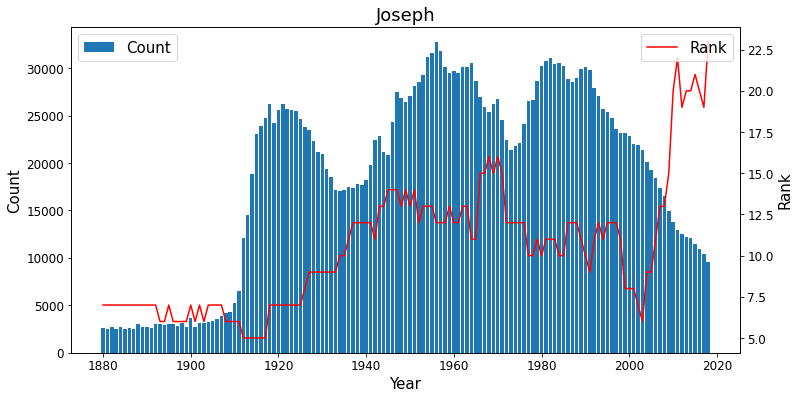

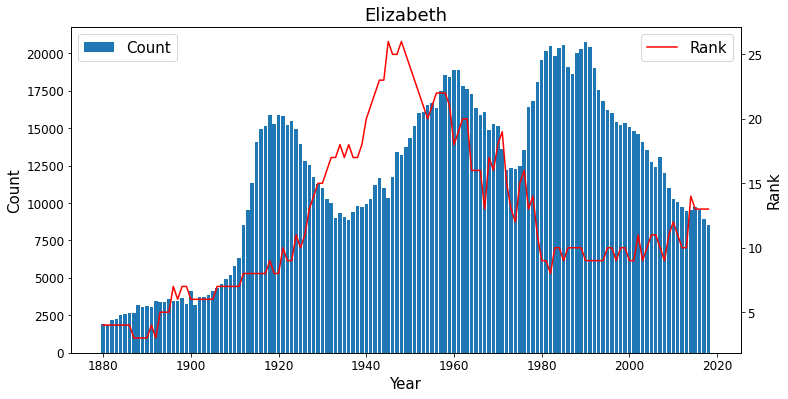

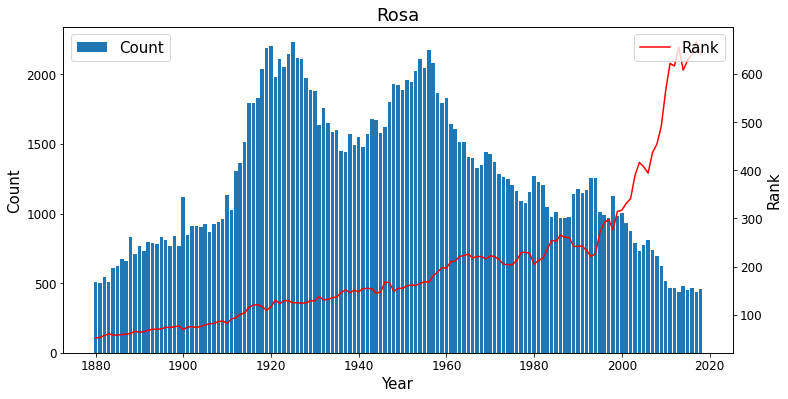

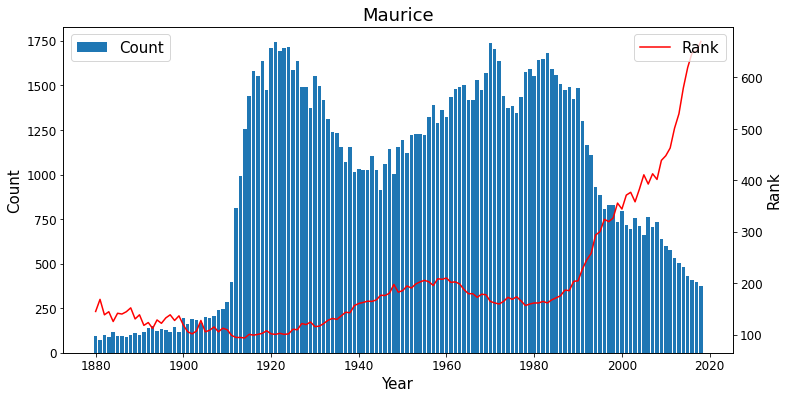

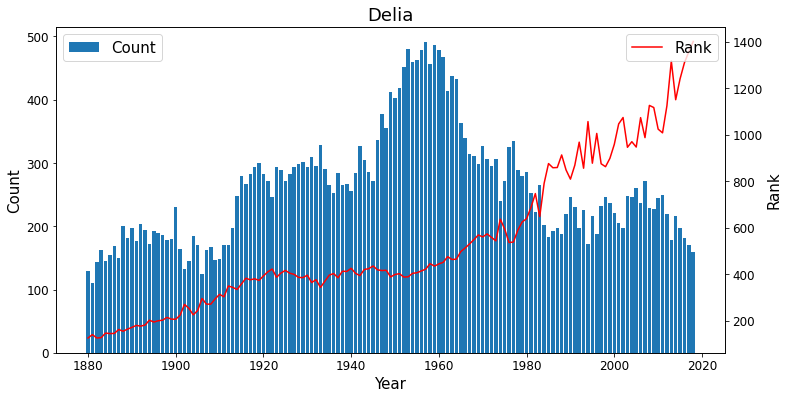

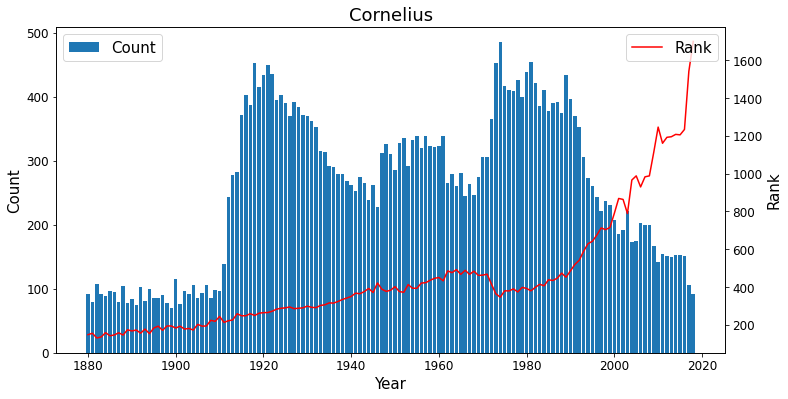

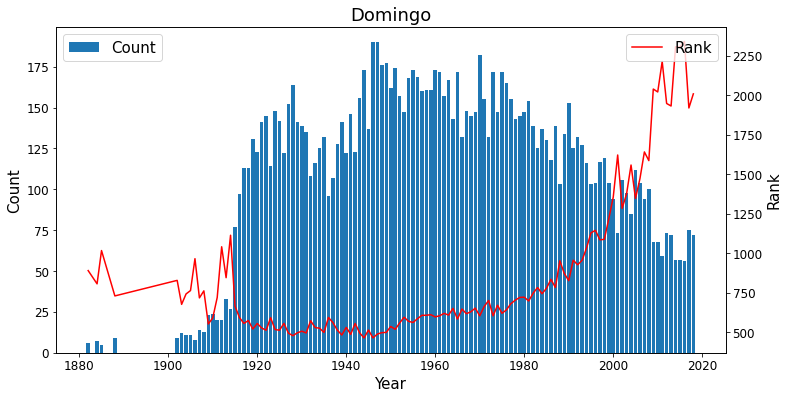

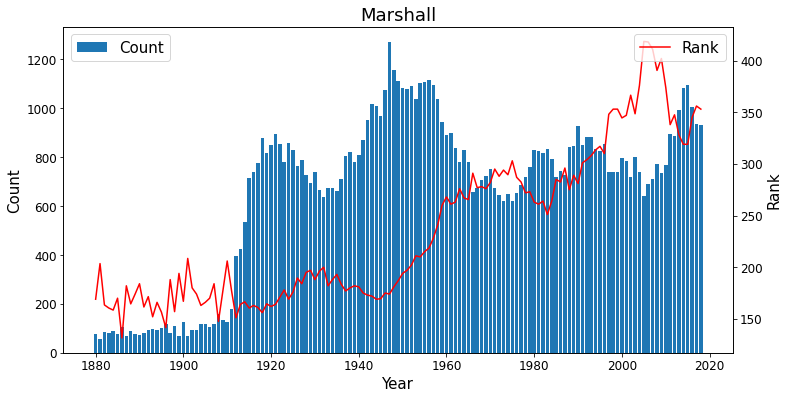

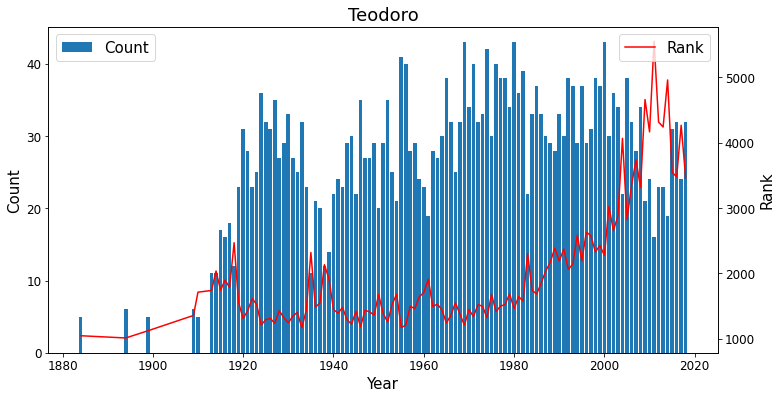

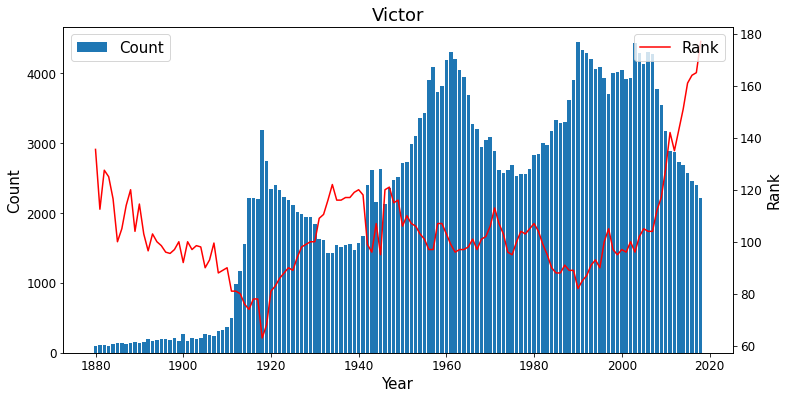

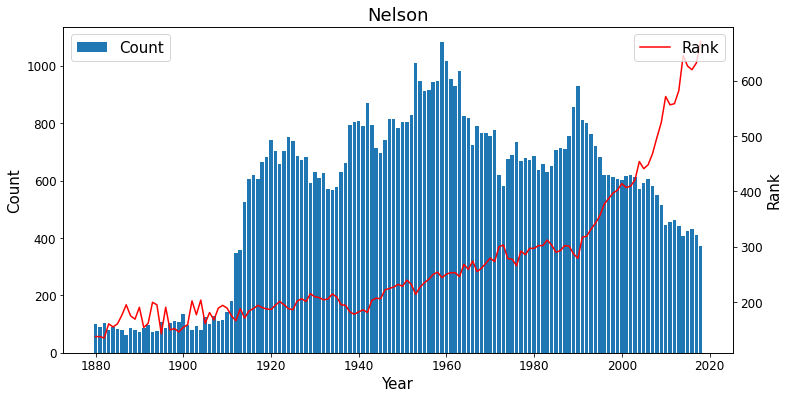

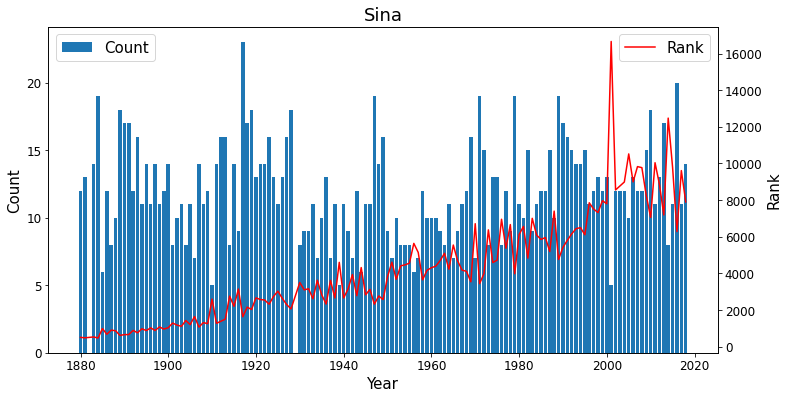

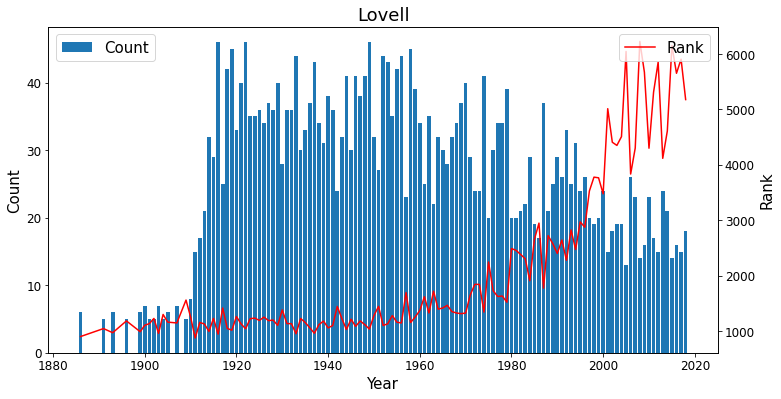

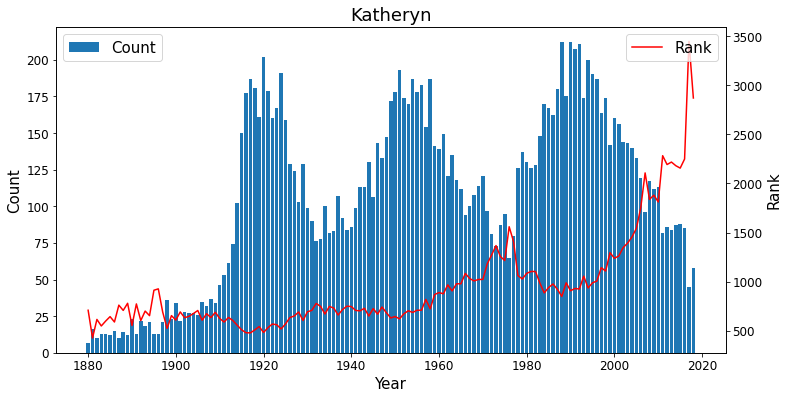

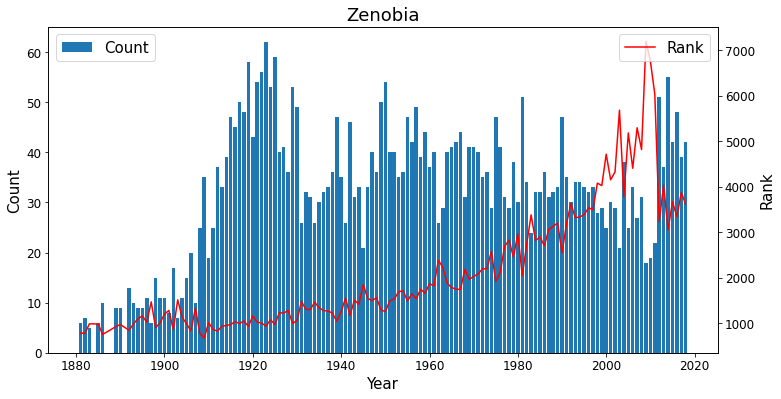

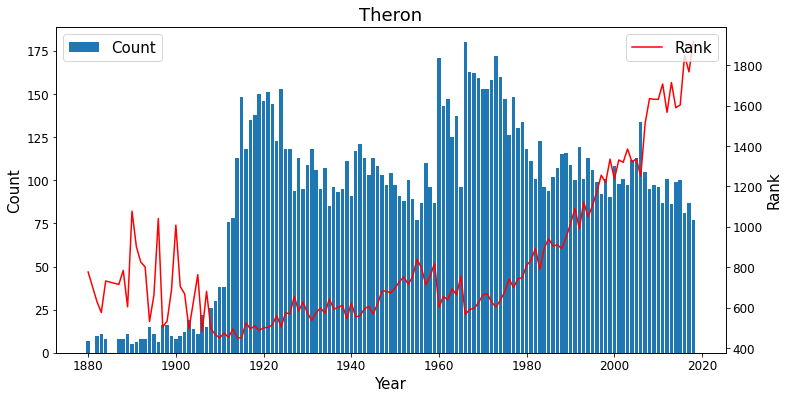

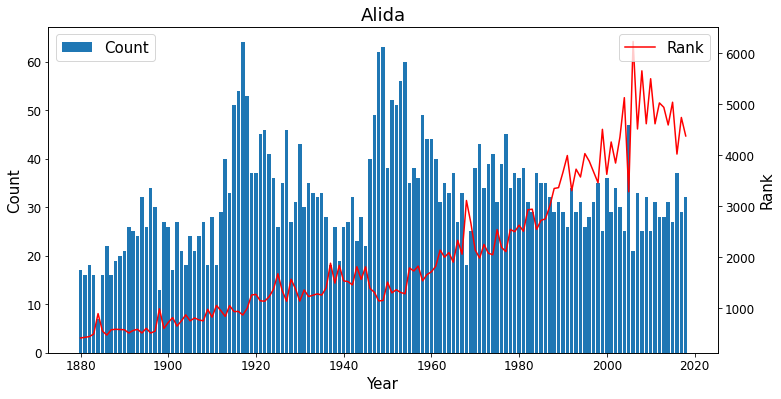

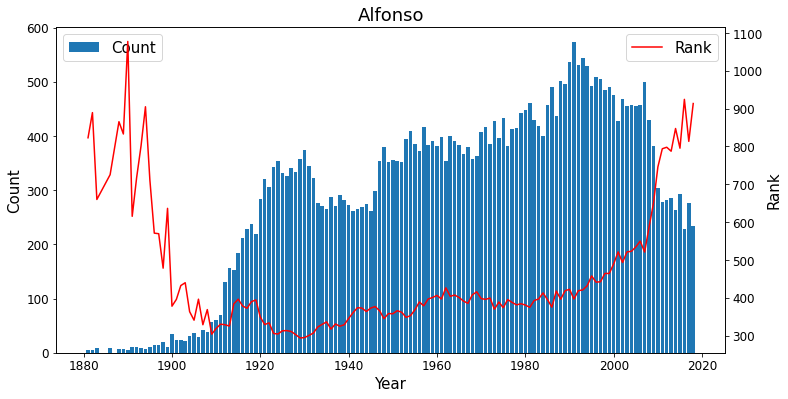

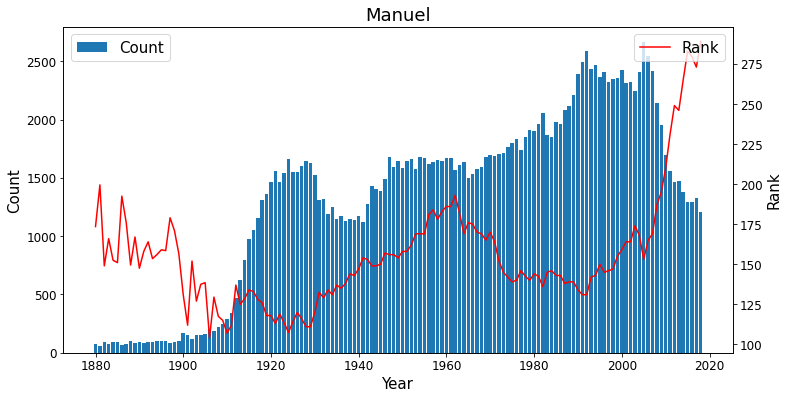

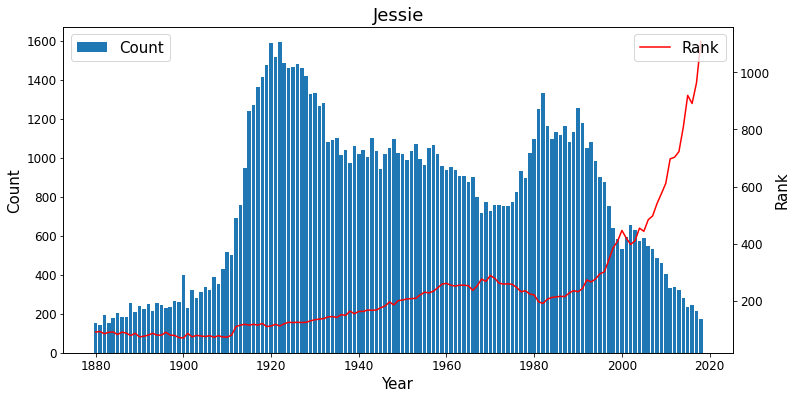

In [83]:
for name in l:
  plot_name(name = name[0], gender = name[1], crit = 'Count')

In [84]:
spike = agg[(agg.Total > 1000) & (agg.Num_of_year > 10)].sort_values(by = 'Spike_score', ascending = False).head(10)

In [85]:
spike

,Name,Gender,Total,Num_of_year,First_year,Last_year,Max_count,Spike_score
102318,Kizzy,F,2325,30,1977,2016,1116,48
139106,Oaklyn,F,1381,11,2006,2018,627,45
46674,Deneen,F,3603,52,1947,2007,1604,45
129832,Moesha,F,1067,14,1996,2014,426,40
120964,Mareli,F,1038,22,1995,2018,411,40
120982,Marely,F,2606,29,1989,2018,1004,39
93217,Kanye,M,1334,17,2002,2018,509,38
91575,Kairo,M,1632,24,1995,2018,605,37
175916,Tennille,F,2172,32,1975,2012,769,35
57410,Ensley,F,1241,20,1997,2018,432,35


In [86]:
l2 = list(zip(spike.Name, spike.Gender))
l2

[('Kizzy', 'F'),
 ('Oaklyn', 'F'),
 ('Deneen', 'F'),
 ('Moesha', 'F'),
 ('Mareli', 'F'),
 ('Marely', 'F'),
 ('Kanye', 'M'),
 ('Kairo', 'M'),
 ('Tennille', 'F'),
 ('Ensley', 'F')]

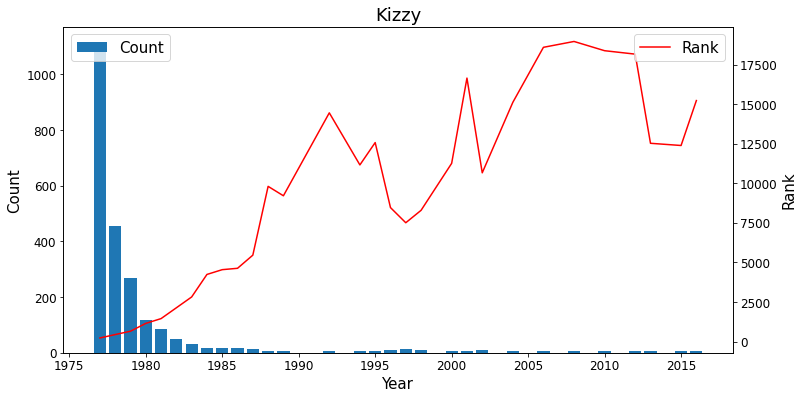

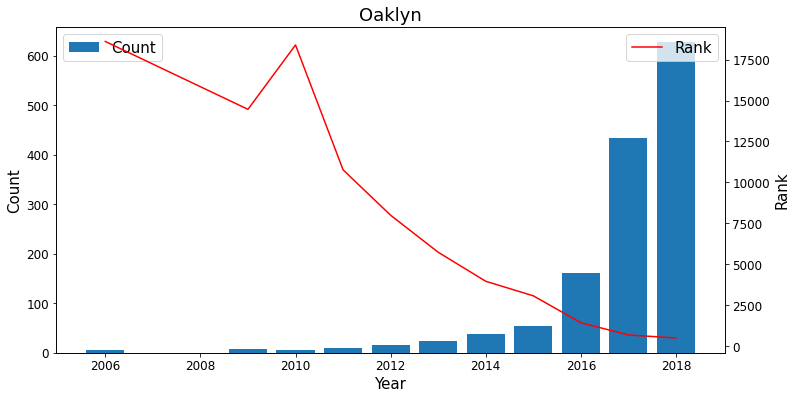

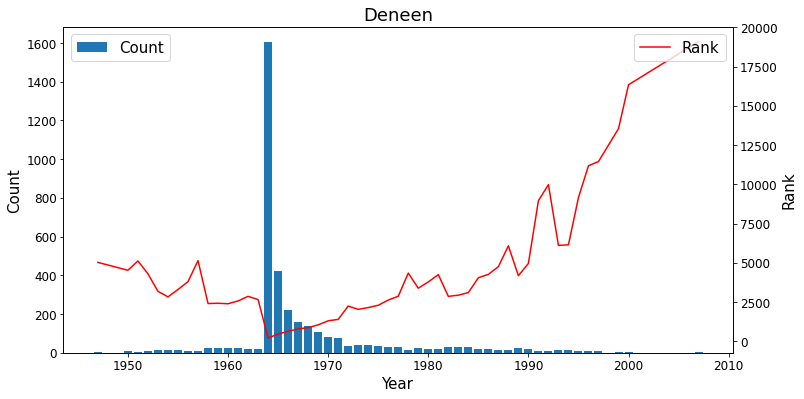

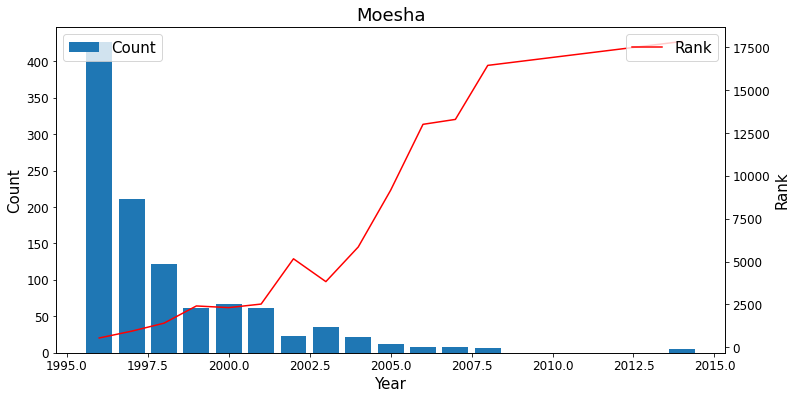

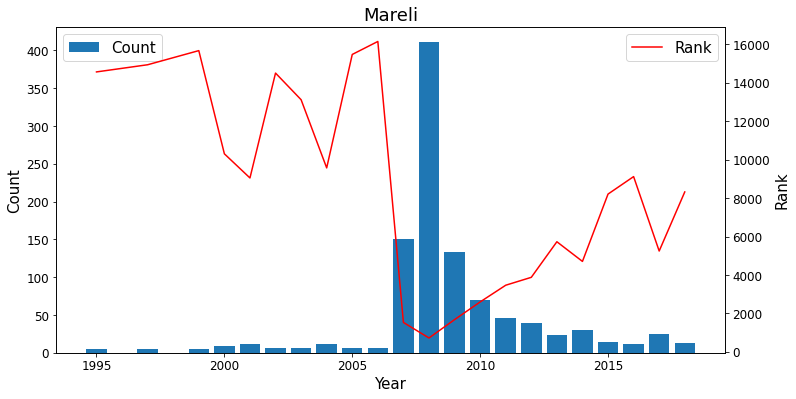

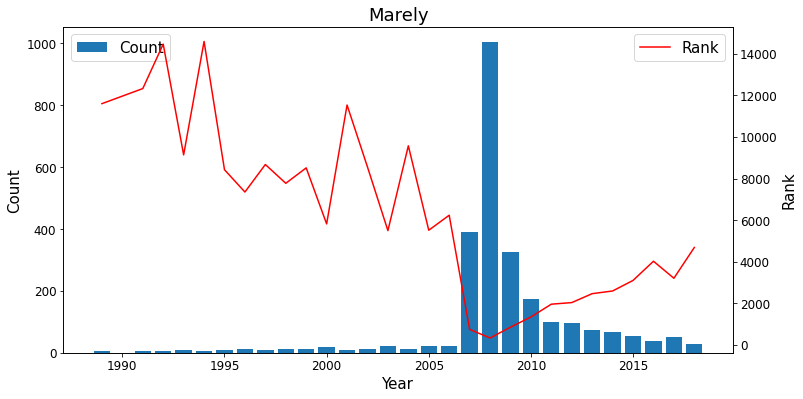

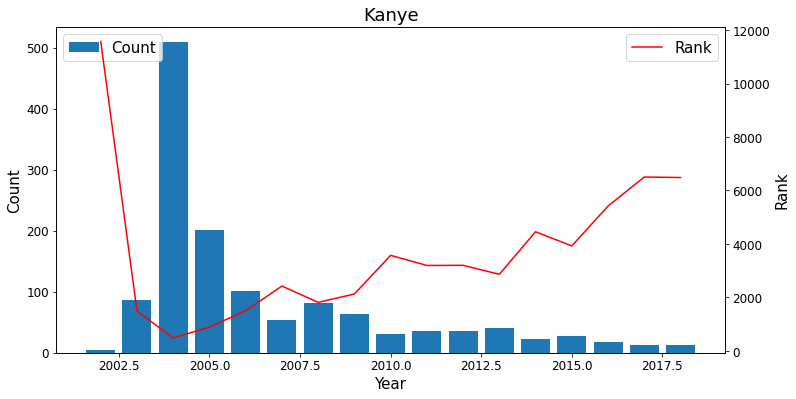

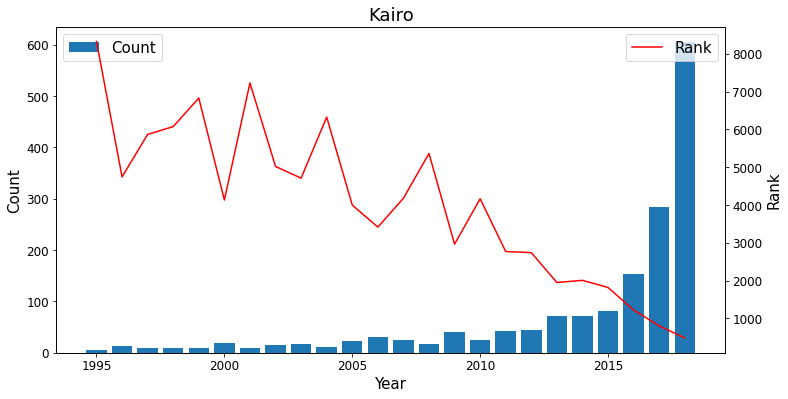

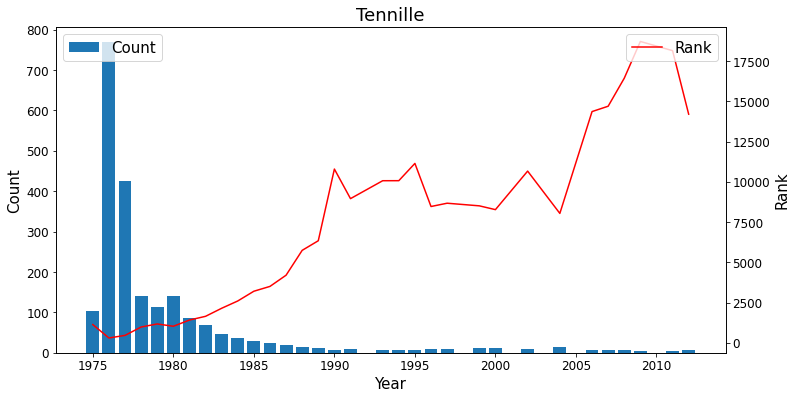

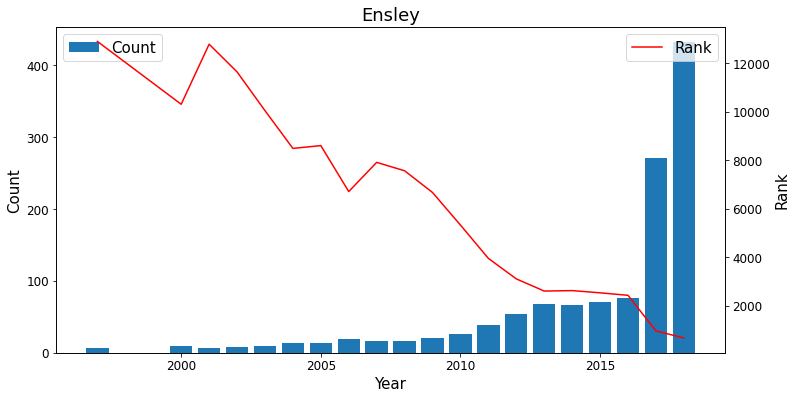

In [87]:
for name in l2:
  plot_name(name = name[0], gender = name[1], crit = 'Count')

##Most popular unisex names

In [88]:
df[df.Name == 'Mary'].groupby(['Name', 'Gender']).Count.sum()

Name  Gender
Mary  F         4125675
      M           15165
Name: Count, dtype: int64

In [89]:
df.groupby(['Name', 'Gender']).Count.sum()

Name     Gender
Aaban    F           0
         M         114
Aabha    F          35
         M           0
Aabid    F           0
                  ... 
Zyyanna  M           0
Zyyon    F           0
         M           6
Zzyzx    F           0
         M          10
Name: Count, Length: 196800, dtype: int64

In [90]:
df.groupby(['Name', 'Gender']).Count.sum().unstack()

Gender,F,M
Name,,
Aaban,0,114
Aabha,35,0
Aabid,0,16
Aabidah,5,0
Aabir,0,10
...,...,...
Zyvion,0,5
Zyvon,0,7
Zyyanna,6,0


In [91]:
unisex = df.groupby(['Name', 'Gender']).Count.sum().unstack()

In [94]:
unisex.replace(0, np.nan, inplace = True)

In [96]:
unisex.dropna(inplace = True)

In [97]:
unisex

Gender,F,M
Name,,
Aaden,5,4828
Aadi,16,851
Aadyn,16,516
Aalijah,149,212
Aaliyah,87442,96
...,...,...
Zyion,168,918
Zyon,620,2638
Zyonn,5,40


###Taking the minimum value of the counts of males and females

In [98]:
unisex.min(axis = 1).sort_values(ascending = False)

Name
Willie   146156
Jordan   131004
Leslie   112726
Taylor   110390
Jessie   110212
          ...  
Hany          5
Hao           5
Haram         5
Harjap        5
Aaden         5
Length: 10773, dtype: float64

In [99]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index

In [100]:
unisex_names

Index(['Willie', 'Jordan', 'Leslie', 'Taylor', 'Jessie', 'Terry', 'Angel',
       'Riley', 'Jamie', 'Kelly',
       ...
       'Hanalei', 'Handy', 'Haniel', 'Hans', 'Hansel', 'Hany', 'Hao', 'Haram',
       'Harjap', 'Aaden'],
      dtype='object', name='Name', length=10773)

In [101]:
unisex.loc[unisex_names].head(20)

Gender,F,M
Name,,
Willie,146156,448946
Jordan,131004,374513
Leslie,267081,112726
Taylor,320446,110390
Jessie,167462,110212
Terry,96895,422916
Angel,95710,231800
Riley,106901,94278
Jamie,268102,85631


In [102]:
unisex = unisex[unisex.min(axis = 1) > 10000]

In [104]:
pd.options.display.float_format = '{:.2f}'.format

In [105]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

Name
Elisha       0.01
Quinn        0.01
Kerry        0.02
Blair        0.03
Kris         0.04
            ...  
Stacey       9.60
Courtney    10.34
Jean        18.07
Ashley      53.00
Mary       271.05
Length: 116, dtype: float64

In [106]:
unisex_names_corrected = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index

In [107]:
unisex.loc[unisex_names_corrected].head(20)

Gender,F,M
Name,,
Elisha,13762.00,13595.00
Quinn,31670.00,32071.00
Kerry,48549.00,49646.00
Blair,14922.00,14527.00
Kris,13504.00,14055.00
Robbie,22290.00,20926.00
Justice,16354.00,17580.00
Riley,106901.00,94278.00
Emerson,20904.00,24472.00
